In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

## Read BGI input

In [58]:
#initial files
cm = pd.read_csv('input/CM2.V412BS.report.tsv', sep='\t')
gt = pd.read_csv('input/gtdbtk.V412BS.bac120.summary.tsv', sep='\t')
gt['Name']  = gt['user_genome'].apply(lambda x: x.split('.',1)[-1])
gt['smpl'] = 'V412BS'
mrg = gt.merge(cm, on='Name')
mrg1 = mrg[['smpl','Name','Completeness','Contamination','classification','fastani_ani','closest_placement_reference']]
mrg1.head(2)

,smpl,Name,Completeness,Contamination,classification,fastani_ani,closest_placement_reference


In [39]:
[os.path.basename(x) for x in glob.glob('./input/CM2*')]

['CM2.V412BS.report.tsv',
 'CM2.V62ZVR.report.tsv',
 'CM2.V9Q7Z9.report.tsv',
 'CM2.V8NC3I.report.tsv',
 'CM2.V61GT1.report.tsv',
 'CM2.VD6NXV.report.tsv',
 'CM2.VC7AA1.report.tsv',
 'CM2.VBGWS0.report.tsv',
 'CM2.V704VW.report.tsv']

In [62]:
#read all CM results
samples_name = ['V412BS','V62ZVR','V9Q7Z9','V8NC3I','V61GT1','VD6NXV','VC7AA1','VBGWS0','V704VW']
results = pd.DataFrame(columns=['smpl','Name','Completeness','Contamination','classification','fastani_ani','closest_placement_reference'])

for smpl in samples_name:
   
    cm = pd.read_csv('input/CM2.'+smpl+'.report.tsv', sep='\t')
    gt = pd.read_csv('input/gtdbtk.'+smpl+'.bac120.summary.tsv', sep='\t')
    gt['Name']  = gt['user_genome'].apply(lambda x: x.split('.',1)[-1])
    gt['Name'] = gt['Name'].str.replace('mpf_','')
    gt['smpl'] = smpl
    mrg = gt.merge(cm, on='Name')
    mrg1 = mrg[['smpl','Name','Completeness','Contamination','classification','fastani_ani','closest_placement_reference']]
    results = pd.concat([results, mrg1])
    
len(results['smpl'].unique())
results.to_excel('results/results.xlsx', index=False)


In [64]:
results = pd.read_excel('results/results_m.xlsx')
results.head(2)

,smpl,Name,Completeness,Contamination,fastani_ani,closest_placement_reference,kingdom,phyla,class,order,family,genera,species
0,V412BS,maxbin.043,98.29,0.51,98.81,GCA_001917175.1,Bacteria,Proteobacteria,Alphaproteobacteria,RF32,CAG-239,51-20,51-20 sp001917175
1,V8NC3I,maxbin.063,97.09,0.81,99.38,GCA_001917175.1,Bacteria,Proteobacteria,Alphaproteobacteria,RF32,CAG-239,51-20,51-20 sp001917175


In [65]:
results.aggregate(['count','nunique'])

,smpl,Name,Completeness,Contamination,fastani_ani,closest_placement_reference,kingdom,phyla,class,order,family,genera,species
count,607,607,607,607,571,571,607,606,606,606,605,603,571
nunique,9,457,480,361,279,328,2,11,14,28,60,203,324


In [74]:
results['species'].value_counts()

Ruminococcus_E bromii_B       7
Ruminococcus_D bicirculans    7
Phocaeicola vulgatus          7
Parabacteroides merdae        7
Odoribacter splanchnicus      7
                             ..
Alloprevotella sp900539625    1
ER4 sp003522105               1
Alloprevotella sp000431275    1
Eubacterium_G sp000434315     1
Haemophilus_D pittmaniae      1
Name: species, Length: 324, dtype: int64

([<matplotlib.patches.Wedge at 0x17ee7a3a0>,
 [Text(0.8831559886058867, 0.6557709202073229, 'Lachnospiraceae'),
  Text(-0.002855971004397648, 1.0999962924617621, 'Bacteroidaceae'),
  Text(-0.577789305522046, 0.936033930167252, 'Oscillospiraceae'),
  Text(-0.9375309246541237, 0.575357076359702, 'Acutalibacteraceae'),
  Text(-1.0892063662636446, 0.15371887226605374, 'Ruminococcaceae'),
  Text(-1.073942777771696, -0.23800611351814807, 'Rikenellaceae'),
  Text(-0.9820446335141347, -0.4955687013786172, 'UBA660'),
  Text(-0.8831559847685304, -0.6557709253752622, 'CAG-272'),
  Text(-0.7666313316475964, -0.7888449792806145, 'Tannerellaceae'),
  Text(-0.6349568930281713, -0.8982370199429611, 'Burkholderiaceae'),
  Text(-0.49811678459333786, -0.980754642561734, 'CAG-508'),
  Text(-0.37234299797952897, -1.0350655495453496, 'Borkfalkiaceae'),
  Text(-0.2630339326472145, -1.068088549829152, 'Gastranaerophilaceae'),
  Text(-0.16219804755111666, -1.0879760077182796, 'Marinifilaceae'),
  Text(-0.05994

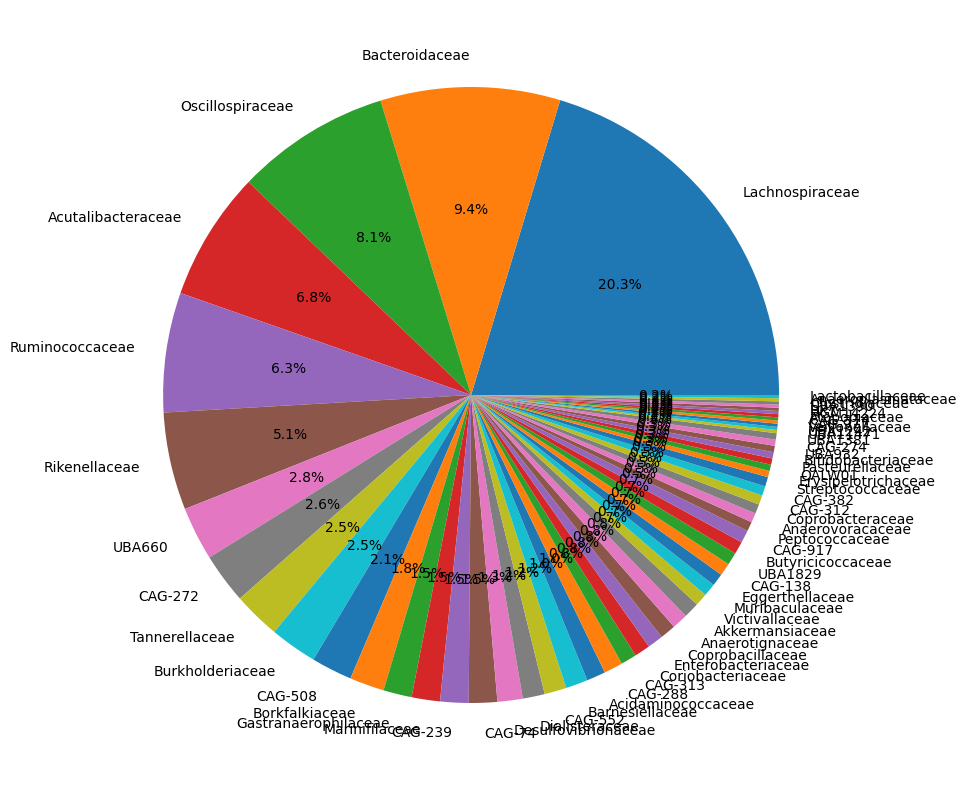

In [71]:
byI = 'family'

plt.figure(figsize=(10,10))
plt.pie(results[byI].value_counts(), labels=results[byI].value_counts().index, autopct='%1.1f%%')